In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Load dataset
df = pd.read_csv("concrete.csv")

# Display dataset information
print("Dataset Overview:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())


Dataset Overview:
    Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 

In [5]:
# Handle missing values
df.dropna(inplace=True)


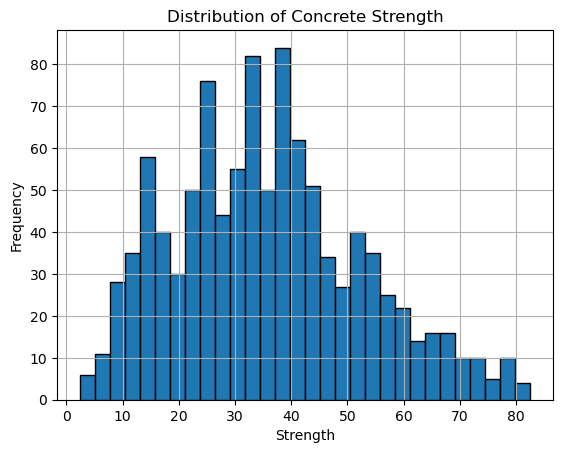

In [7]:
# Explore the target variable
df["strength"].hist(bins=30, edgecolor='black')
plt.title("Distribution of Concrete Strength")
plt.xlabel("Strength")
plt.ylabel("Frequency")
plt.show()


In [13]:
# Standardizing numerical features
scaler = StandardScaler()
X = df.drop(columns=["strength"])
y = df["strength"]
X_scaled = scaler.fit_transform(X)

In [15]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [17]:
# Model Selection
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [19]:
# Model Training & Evaluation
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred)
    }


In [21]:
# Feature Importance (for tree-based models)
feature_importance = pd.DataFrame({
    "Feature": df.drop(columns=["strength"]).columns,
    "Importance": models["Random Forest"].feature_importances_
}).sort_values(by="Importance", ascending=False)

In [23]:
# Hyperparameter Tuning for Gradient Boosting
param_grid = {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2]}
gb_grid = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5, scoring='r2')
gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_
y_pred_gb = best_gb.predict(X_test)
results["Tuned Gradient Boosting"] = {
    "MAE": mean_absolute_error(y_test, y_pred_gb),
    "MSE": mean_squared_error(y_test, y_pred_gb),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_gb)),
    "R2": r2_score(y_test, y_pred_gb)
}


In [25]:
# Comparative Analysis
for model, metrics in results.items():
    print(f"\n{model} Performance:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")



Linear Regression Performance:
MAE: 7.745559243921436
MSE: 95.97094009110688
RMSE: 9.796475901624364
R2: 0.6275531792314848

Random Forest Performance:
MAE: 3.7142518452380946
MSE: 29.58240284470852
RMSE: 5.438970752330676
R2: 0.885195749049184

Gradient Boosting Performance:
MAE: 4.13501415087457
MSE: 30.17689818858975
RMSE: 5.493350360990071
R2: 0.8828886141958622

Tuned Gradient Boosting Performance:
MAE: 3.082440735018357
MSE: 18.853044268340543
RMSE: 4.342009243235273
R2: 0.9268345564513004


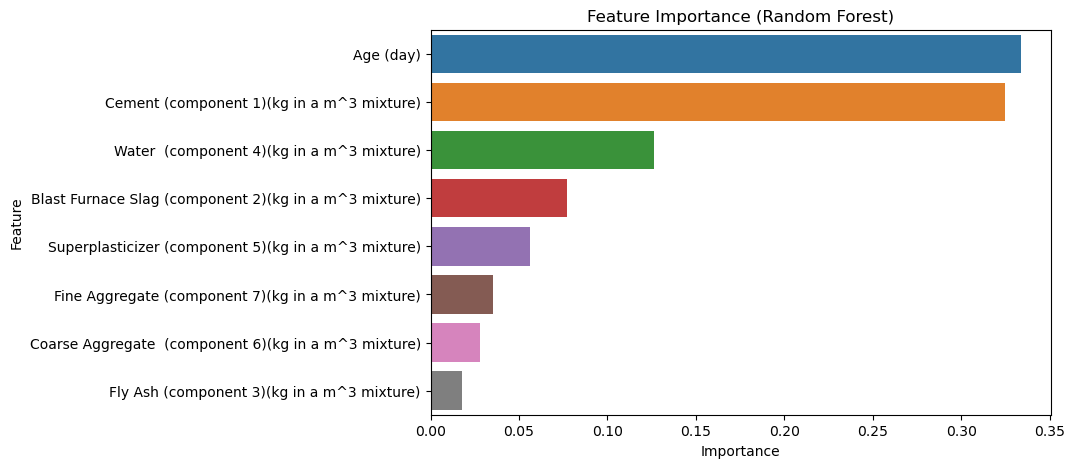


Conclusion: The best-performing model is determined based on the highest R² and lowest RMSE.


In [27]:
# Plot Feature Importance
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance["Importance"], y=feature_importance["Feature"])
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

print("\nConclusion: The best-performing model is determined based on the highest R² and lowest RMSE.")
